<font size="5">**<center>Predicting Credit Card Default**</font>

## Libraries

In [1]:
# Loading the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
import pickle
import numpy as np

## Introduction

This project aims to develop a model that predicts the likelihood of credit card default.

## Business Problem

Credit default prediction is central to managing risk in a consumer lending business. One way of achieving this is by using a model to determine the likelihood of customers defaulting on their credit card payments. Knowing such information allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Therefore, this topic is relevant to consumer lenders.

## Dataset

To achieve the objective of this project, the credit card client’s dataset will be used. This data can be found at the following location:

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Loading the dataset

In [2]:
# Data was downloaded from the link above. Now, it is being Loaded from the local drive.
credit_card_df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
# Checking the first five rows
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


The above output shows the first five rows and all the features of the dataset. All features appear to be populated.

In [4]:
# Checking the last five rows in the dataset.
credit_card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


The above output shows the last five rows and all the features of the dataset. All features appear to be populated.

In [5]:
# Checking the dimension of the data.
credit_card_df.shape

(30000, 25)

The dataset has 25 features and 30000 observations. This is consistent with the description of the dataset from the original source(i.e Kaggle). Therefore, the dataset was correctly loaded.

In [6]:
# Checking the information in the dataset.
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Based on the output above,there are 25 features in the dataset:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

The data types appear to make sense. The non-null count shows there are no missing values.Let's now do some further data exploration.

### Data Cleaning

#### Missing value analysis and treatment

In [7]:
#Checking missing values.
credit_card_df.isna().sum().to_frame(name = 'Number of missing value')

,Number of missing value
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


The output above shows that the dataset has no missing values.

#### Duplicate rows and treatment

In [8]:
# Checking number of duplicates in the dataset.
duplicates = credit_card_df.duplicated(subset= None, keep='first').sum()
print("Number of duplicates which should be removed: ", duplicates)

Number of duplicates which should be removed:  0


#### Multicollinearity and treatment

Some columns are similar: the payment columns, payment amount columns and billamount columns. We are now going to check if columns in these groups are correlated using correlation heatmaps.

    Bill Amount Columns

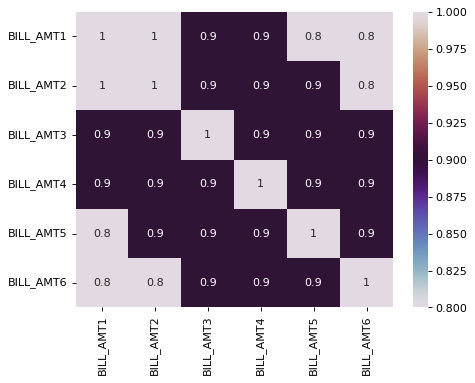

In [9]:
# Checking correlations among the bill amount columns.
plt.figure(dpi=80)
sns.heatmap(np.round(credit_card_df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(),1),annot=True, cmap="twilight")

plt.show()

The heatmap shows that there is high correaltion between all billamount columns. Hence, we will retain one billamount column and delete the remaining ones to prevent multicollinerity issues.

    Pay Columns

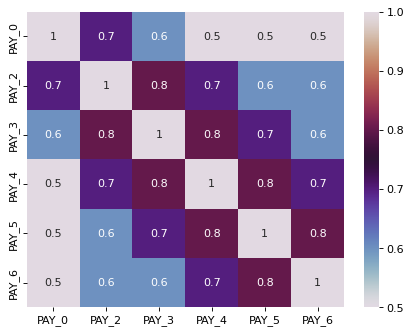

In [10]:
# Checking correlations among the pay columns.
plt.figure(dpi=80)
sns.heatmap(np.round(credit_card_df[['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(),1),annot=True, cmap="twilight")
plt.show()

The heatmap shows that there is high correaltion between all pay columns. Hence, we will retain only one column and delete the remaining ones to prevent multicollinerity issues.

    Pay Amount Columns

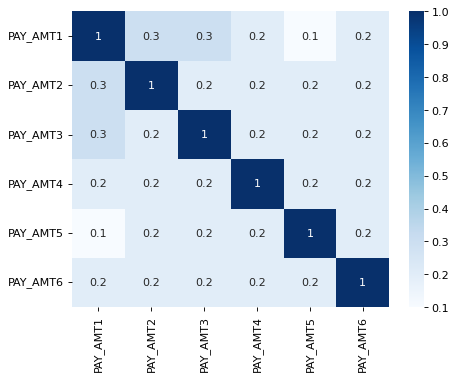

In [11]:
# Checking correlations among the pay amount columns.
plt.figure(dpi=80)
sns.heatmap(np.round(credit_card_df[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr(),1),annot=True, cmap="Blues")
plt.show()

The heatmap shows no correlation between the columns.Hence, all the pay amount columns will be retained.

    Dropping Irrelevant features

Irrevant features in this case are those that would trigger multicolinerity and the ID feature.

In [12]:
# Deleting colums to remove multicollinearity issue
credit_card_df.drop(columns = ['ID', 'PAY_6', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace = True)

# Displaying firts five columns after dropping columns
credit_card_df.head()



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


All irrelevant features have been dropped

#### Outlier analysis and treatment

Inter Quartile Range(IQR) approach to finding the outliers is the most commonly used and most trusted approach used in the research field.  It first computes the first quartile (Q1) and third quartile (Q3), then calculates the IQR as the difference between Q3 and Q1, providing a measure of the spread of the middle 50% of the data in the variable under consideration. An outlier is any observation outside +/- 1.5IQR.

In [13]:
# Extracting the numeric features with float dtype.
# Interger dtype is used for categorical features except for age.
numeric_df = credit_card_df.select_dtypes(exclude=int)
numeric_features = list(numeric_df.columns)
# Adding Age to the list of numeric features.
#numeric_features = numeric_features + ['AGE']
print(numeric_features)
print(' ')
print('The dataset has ',len(numeric_features),'numeric columns.')


['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
 
The dataset has  8 numeric columns.


    Detecting outliers

In [14]:
def check_outliers(dataframe,variables):
    """ This function creates boxplots which are used to detect outliers."""
    title_string = "Detecting outliers using boxplots"
    plt.figure(figsize=(9,9))
    for n, variable in enumerate(variables):
        
        # add a new subplot iteratively
        ax = plt.subplot(int(len(variables)/2), 2, n + 1)
        
        # plotting the boxplots on the subplot axis
        plt.boxplot(dataframe[variable],vert=False)
        
        # chart formatting
        ax.set_title(variable.lower())
        
        ax.set_xlabel("")
        plt.subplots_adjust(bottom=0.000001,wspace=0.4, hspace=0.4)  
        plt.suptitle(title_string, y=.95, fontsize=14)

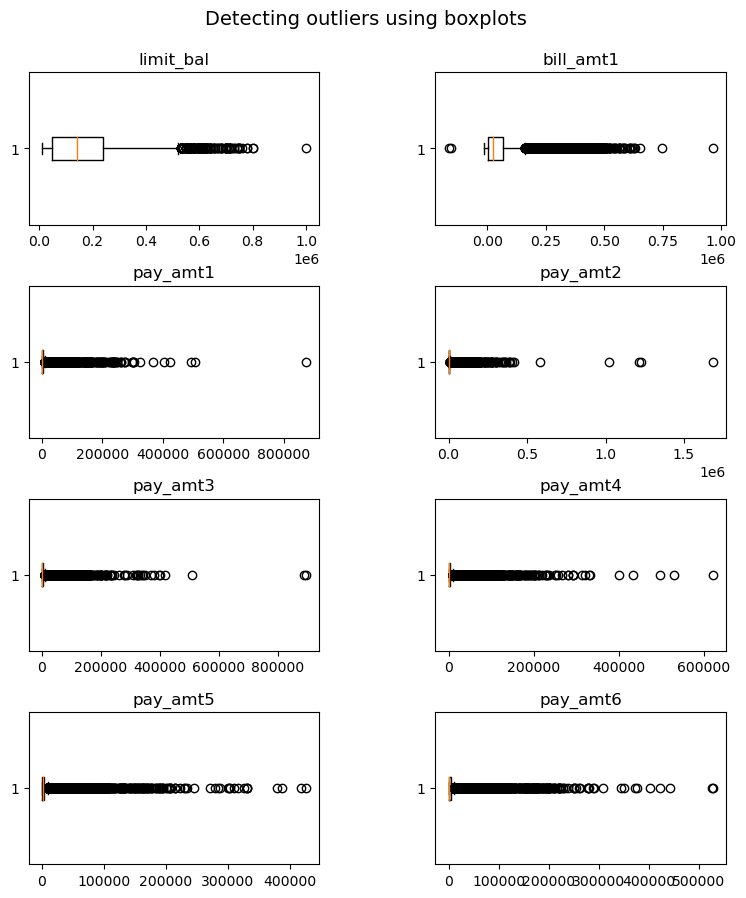

In [15]:
check_outliers(credit_card_df, numeric_features)

The boxplots above show that there are some variables with outliers. Outliers will be quantitatively identified below.

    Removing Outliers

In [16]:
def outliers(dataframe,variable):
    ''' Function to quantitatively identify outliers'''
    # Calculate the Upper(Q3) and Lower(Q1) limits
    Q1  = dataframe[variable].quantile(0.25)
    Q3  = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
        
    # List to creat indexes of outliers
    list_of_outliers = dataframe.index[(dataframe[variable] < lower)
                                       |(dataframe[variable]> upper)]
    return list_of_outliers  

In [17]:
# Create Empty list to store the output indices for outliers
index_list =[]
for feature in numeric_features:
    index_list.extend(outliers(credit_card_df,feature))

In [18]:
def remove(dataframe,list_of_outliers):
    ''' Function to remove outliers from a dataframe'''
    list_of_outliers = sorted(set(list_of_outliers ))
    dataframe =  dataframe.drop(list_of_outliers)
    return dataframe

In [19]:
# Removing outliers from the dataset and creating a dataframe free from outliers
credit_card_cleaned_df = remove(credit_card_df, index_list)

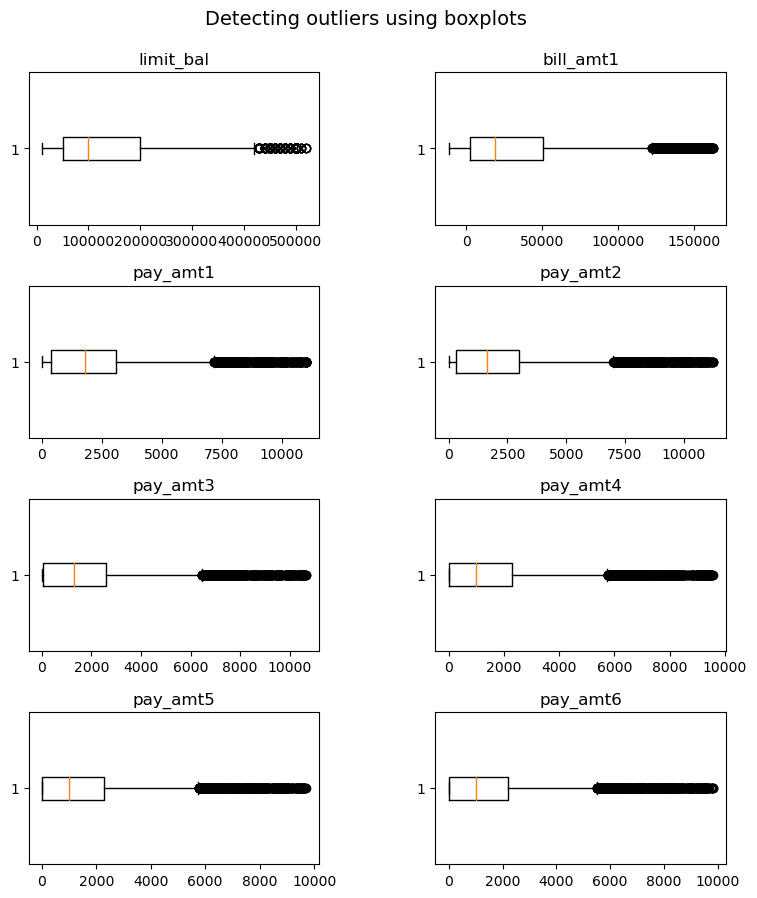

In [20]:
# Check outliers on the cleaned dataset.
check_outliers(credit_card_cleaned_df, numeric_features)

The boxplot above show the features without outliers.

In [21]:
# Shape of dataframe with outliers
credit_card_df.shape

(30000, 14)

In [22]:
# Shape of dataframe without outliers
credit_card_cleaned_df.shape

(20293, 14)

Outlier removal was successful since the observations in the new dataframe is lower than the original dataframe. The dataframe without outliers will be used to build the model.

### Data Exploration

#### Distribution Target

In [23]:
# Name of the target column is too long. For convinience we will rename it to target.
credit_card_cleaned_df=credit_card_cleaned_df.rename(columns={'default.payment.next.month':'target'})

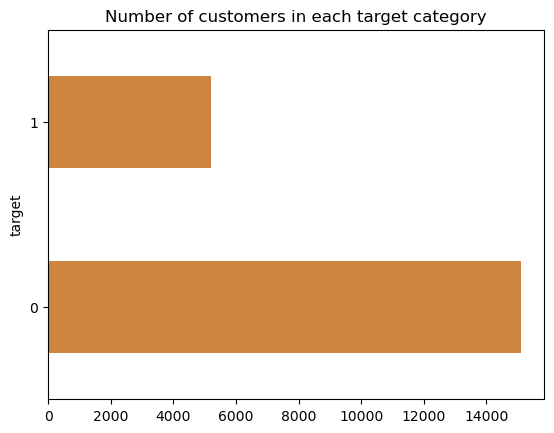

In [24]:
# Calculating number of reviews in each target category
counts = credit_card_cleaned_df['target'].value_counts()

# Plotting the target categories.
#figsize = (4,4)
counts.plot(kind='barh', title="Number of customers in each target category",
            color = 'peru');

In [25]:
counts

target
0    15089
1     5204
Name: count, dtype: int64

Most of the customers in the dataset did not default(i.e target = 0). Therefore, our data is biased towards non-default. This is a problem called class imbalance. Why would this be problematic? With so few defaults relative to non-defaults, the training model will spend most of its time on non-default examples and not learn enough from defaults. As a consequence, it will not be easily be able to predict defaults when implemented. To migate this risk, the downsampling technique is going to be used. The technique is performed by randomly sampling the majority class in order to get the number of observations that matches the number of observations in the  minority class.

#### Relationship between categorical features and the target

    Chi-square test
  
A chi-square test is used to test whether two categorical variables are related to each other or not. It is conducted by making the following hypothesis :
  - Null hypothesis       : There is no relationship between the variables.
  - Alternative hypothesis: There is a relationship between the variables.

Proper use of the Chi-Square test requires the following assumptions to be met:
  - Observations must be independent and random to ensure the sample properly represents the population. 
  - Categories of both variables must be mutually exclusive; this is so observations can only fall into one category or the other, but not both. 
  - Categories of the categorical variables should be independent; neither category should have any influence on the other.

In this project, the chi-square test will be used to test whether there is a relationship between the independent categorical variables and the target variable. The metric which will be used to evaluate the results is the P-value. If the P-value is lower or equal to 0.05, the null hypothesis will be rejected. However, if the P-value is greater than 0.05, the null hypothesis will not be rejected.

Notably, the categorical variables and observations in the dataset  satisfies the assumptions above.

Test 1 : Relationship between the target and gender

In [26]:
# create contingency table
churner_contingency = pd.crosstab(credit_card_cleaned_df['target'],
                                  credit_card_cleaned_df['SEX'])

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(churner_contingency)

# Printing the P value
print("P-value : ",round(pval,2))

P-value :  0.0


Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis and conclude that there is a relationship between gender and the target.

Test 2: Relationship between the target and Education

In [27]:
# create contingency table
churner_contingency = pd.crosstab(credit_card_cleaned_df['target'],
                                  credit_card_cleaned_df['EDUCATION'])

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(churner_contingency)

# Printing the P value
print("P-value : ",round(pval,2))

P-value :  0.0


Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis and conclude that there is a relationship between the education feature and the target.

Test 3 : Relationship between the target and marriage.

In [28]:
# create contingency table
churner_contingency = pd.crosstab(credit_card_cleaned_df['target'],
                                  credit_card_cleaned_df['MARRIAGE'])

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(churner_contingency)

# Printing the P value
print("P-value : ",round(pval,2))

P-value :  0.0


Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis and conclude that there is a relationship between marriage and the target.

Based on the chi square test, all the categorical features have a relationship with the target. Therefore, none of them will be dropped for now.

#### Relationship between numerical features and the target

To test the relationship between the numeric features and the target, the follwowing assumption will be relied upon:

- If the average of the numeric feature  changes for each class of the target variable, then there is a relationship between that numeric feature and the target variable. 

Bar charts will be created to visualize the relationship between numeric features and the target variable.

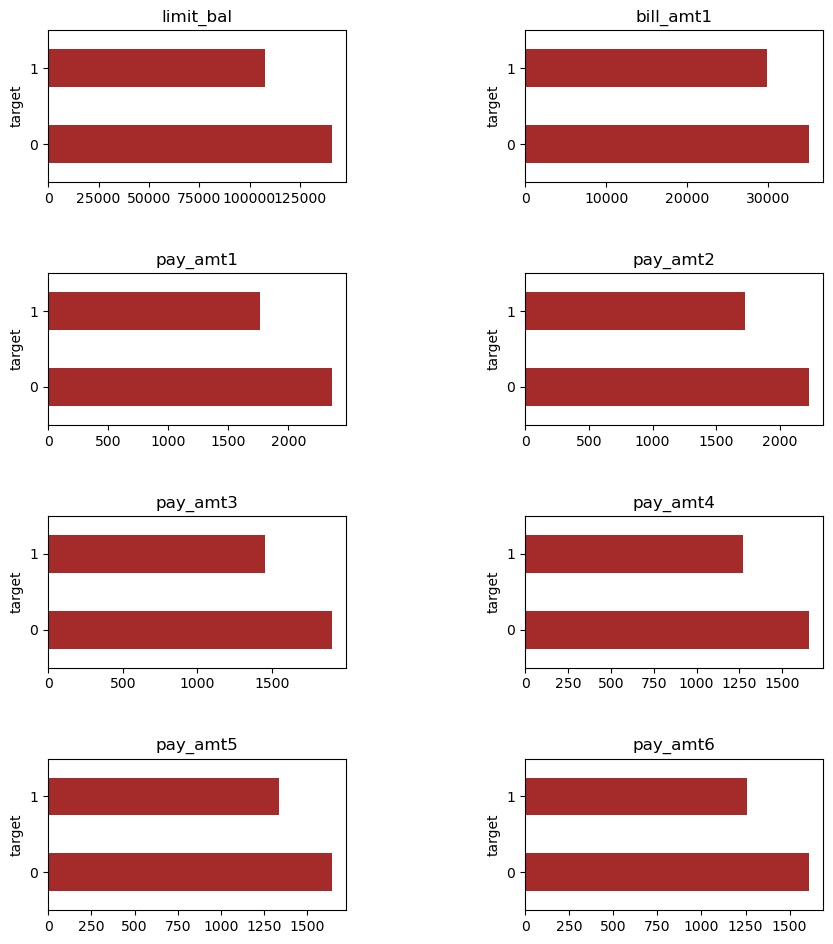

In [29]:
plt.figure(figsize=(10,10))
for n, feature in enumerate(numeric_features):
    # Calculating average of each numeric variable
    average = credit_card_cleaned_df.groupby(['target'])[feature].mean()
    # add a new subplot iteratively
    ax = plt.subplot(int(len(numeric_features)/2), 2, n + 1)
        
    # plotting the boxplots on the subplot axis
    average.plot(kind='barh',color='brown')
        
     # chart formatting
    ax.set_title(feature.lower())
        
    ax.set_xlabel("")
    plt.subplots_adjust(bottom=0.000001,wspace=0.6, hspace=0.6)  
   # plt.suptitle(title_string, y=.95, fontsize=14)

The bar charts shows that the average values of all features are different for each label of the target.This indicates that there is a relationship between the target and these features. Therefore, none of them will be dropped.

#### Relationship among Numeric features

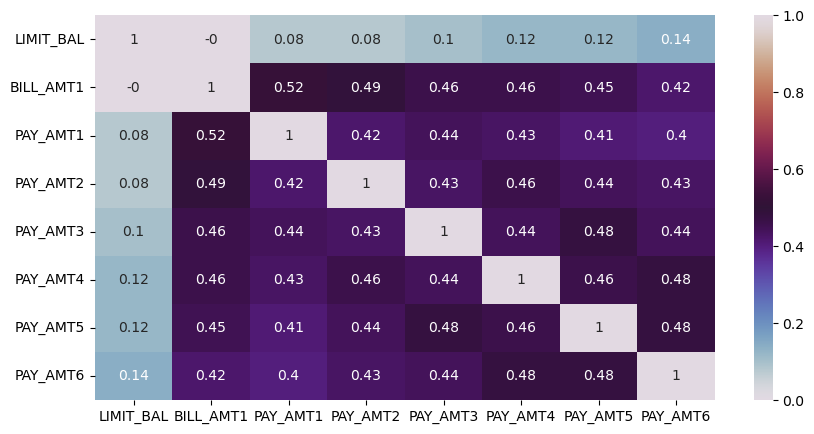

In [30]:
# Filtering out numeric features.
numeric_df = credit_card_cleaned_df.select_dtypes(exclude=int)
fig, corr = plt.subplots(figsize = (10, 5))
corr = sns.heatmap(np.round(numeric_df.corr(), 2),annot=True, cmap="twilight")

Since all correlation coefficients are less 0.5, there is no evidence of strong correlation among numeric features. Therefore, multicollinearity will not be an issue.

From the data exploration one thing need to be addressed before proceeding with modeling:
 
 - The target distribution shows that the data has a class imbalance problem i.e There are exremely more non-defaults than defaults. This problem will be addressed by downsampling the non-defaults. Models will be built on both the downsampled data and the original dataset. The model with better performance will be selected.

#### Downsampling

In [31]:
# Checking the counts in each target label
credit_card_cleaned_df['target'].value_counts()

target
0    15089
1     5204
Name: count, dtype: int64

In the output above, zero represents the non-defaults. These will be downsampled so that they equal the number of defaults(5204).

In [32]:
# Sampling 5204 observations from the non-defaults

non_defaults = credit_card_cleaned_df.loc[credit_card_cleaned_df.target== 0].sample(5204)

defaults = credit_card_cleaned_df.loc[credit_card_cleaned_df.target== 1]

credit_card_ds_df = pd.concat([non_defaults, defaults])
credit_card_ds_df.shape

(10408, 14)

Target distribution after downsampling

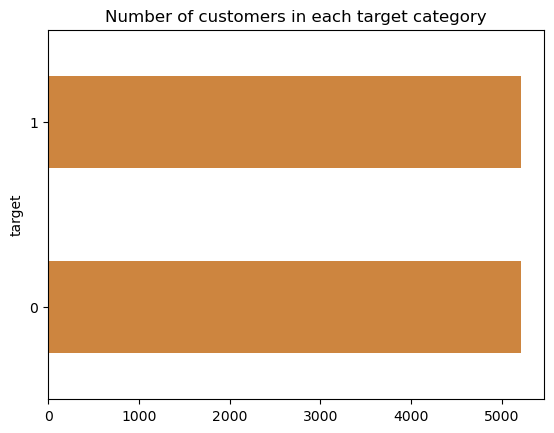

In [33]:
# Calculating number of customers in each target category after downsampling
counts = credit_card_ds_df['target'].value_counts()

# Plotting the target categories after downsampling
counts.plot(kind='barh', title="Number of customers in each target category",
            color = 'peru');

## Data Partitioning

    Partitioning the original data(i.e the data which is not downsampled)

In [34]:
# Extracting features from the dataset.
features = credit_card_cleaned_df.drop(['target'], axis=1)

# Extracting the target from the dataset.
target = credit_card_cleaned_df['target']

In [35]:
# Splitting data into training and test sets.
train_features, test_features,train_target,test_target = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.2,
                                                                          random_state=1,
                                                                          stratify=target)

    Partitioning the downsampled data

In [36]:
# Extracting features from the dataset.
features_ds = credit_card_ds_df.drop(['target'], axis=1)

# Extracting the target from the dataset.
target_ds = credit_card_ds_df['target']

In [37]:
# Splitting data into training and test sets.
train_features_ds, test_features_ds,train_target_ds,test_target_ds = train_test_split(features_ds, 
                                                                          target_ds, 
                                                                          test_size=0.2,
                                                                          random_state=1,
                                                                          stratify=target_ds) 

## Model Building

In [38]:
# Creating the pipelines for Logistic regression,random forest and XGBOOST.
pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier())])
pipeline_xg = Pipeline([('xgboost', XGBClassifier())])

In [39]:
# function to fit the model and make predictions
models = {
    'logistic_regression' : pipeline_lr,
    'Random Forest' : pipeline_rf,
    'XGBoost' : pipeline_xg
}

def model_prediction_original(name, model,train_test_features, yactual):
        model.fit(train_features,train_target)
        ypred = model.predict(train_test_features)
        precision, recall, f_beta, support = precision_recall_fscore_support(yactual, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(yactual, ypred)
        accuracy = accuracy_score(yactual, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy   : {accuracy:.2f}")
        print(f"Precision  : {precision:.2f}")
        print(f"Recall     : {recall:.2f}")
        print(f"Fscore     : {f_beta:.2f}")
        print(f"AUC        : {auc:.2f}\n")
        
def model_prediction_ds(name, model,train_test_features, yactual):
        model.fit(train_features_ds,train_target_ds)
        ypred = model.predict(train_test_features)
        precision, recall, f_beta, support = precision_recall_fscore_support(yactual, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(yactual, ypred)
        accuracy = accuracy_score(yactual, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy   : {accuracy:.2f}")
        print(f"Precision  : {precision:.2f}")
        print(f"Recall     : {recall:.2f}")
        print(f"Fscore     : {f_beta:.2f}")
        print(f"AUC        : {auc:.2f}\n")
        
        
        

## Model Evaluation

### Model performance on original data training set

In [40]:
# Running the models on the training set
for name, model in models.items():
    model_prediction_original(name, model,train_features,train_target)

Model name : logistic_regression
Accuracy   : 0.74
Precision  : 0.81
Recall     : 0.74
Fscore     : 0.70
AUC        : 0.50

Model name : Random Forest
Accuracy   : 1.00
Precision  : 1.00
Recall     : 1.00
Fscore     : 1.00
AUC        : 1.00

Model name : XGBoost
Accuracy   : 0.89
Precision  : 0.89
Recall     : 0.89
Fscore     : 0.88
AUC        : 0.80



### Model performance on original data testing set

In [41]:
# Running the models on the test set
for name, model in models.items():
    model_prediction_original(name, model,test_features,test_target)

Model name : logistic_regression
Accuracy   : 0.74
Precision  : 0.81
Recall     : 0.74
Fscore     : 0.70
AUC        : 0.50

Model name : Random Forest
Accuracy   : 0.79
Precision  : 0.77
Recall     : 0.79
Fscore     : 0.78
AUC        : 0.66

Model name : XGBoost
Accuracy   : 0.78
Precision  : 0.76
Recall     : 0.78
Fscore     : 0.77
AUC        : 0.65



The performance of the logistic regression model on the training set is the same as its performance on the test set. Therefore, there is no evidence that its overfitting.The random forest and XGboost classifier perform better than the logistic regression on the training set, however, their performance significantly decreases on the test set(More than 5% decrease). This is an indication that they are overfitting the data.

### Model performance on downsampled data training set

In [42]:
# Running the models on the training set
for name, model in models.items():
    model_prediction_ds(name, model,train_features_ds,train_target_ds)

Model name : logistic_regression
Accuracy   : 0.59
Precision  : 0.59
Recall     : 0.59
Fscore     : 0.59
AUC        : 0.59

Model name : Random Forest
Accuracy   : 1.00
Precision  : 1.00
Recall     : 1.00
Fscore     : 1.00
AUC        : 1.00

Model name : XGBoost
Accuracy   : 0.92
Precision  : 0.92
Recall     : 0.92
Fscore     : 0.92
AUC        : 0.92



### Model performance on downsampled data testing set

In [43]:
# Running the models on the test set
for name, model in models.items():
    model_prediction_ds(name, model,test_features_ds,test_target_ds)

Model name : logistic_regression
Accuracy   : 0.60
Precision  : 0.60
Recall     : 0.60
Fscore     : 0.60
AUC        : 0.60

Model name : Random Forest
Accuracy   : 0.69
Precision  : 0.69
Recall     : 0.69
Fscore     : 0.69
AUC        : 0.69

Model name : XGBoost
Accuracy   : 0.68
Precision  : 0.68
Recall     : 0.68
Fscore     : 0.68
AUC        : 0.68



The random forest and XGboost classifier perform better than the logistic regression on the training set, however, their performance significantly decreases on the test set(More than 5% decrease). This is an indication that they are overfitting the data.The performance of the logistic regression model on the training set is the same as its performance on the test set. Therefore, there is no evidence that its overfitting. However, the logistic regression on the original dataset performs better than the logistic regression on the downsampled data.

### Best Model

The logistic regression on the original dataset is selected as the best model because it performs better than the logistic regression on the downsampled data and there is no evidence that it is overfitting the data.

## Model Deployment

The best model will now be saved as a pickle file for deployment.

In [44]:
# Creating pipelines
models = {
    'logistic_regression' : pipeline_lr,
    'Random Forest' : pipeline_rf,
    'XGBoost' : pipeline_xg
}

# Function to fit the model and make predictions
def model_prediction_original(name, model,train_test_features, yactual):
        model.fit(train_features,train_target)
        ypred = model.predict(train_test_features)
        precision, recall, f_beta, support = precision_recall_fscore_support(yactual, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(yactual, ypred)
        accuracy = accuracy_score(yactual, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy   : {accuracy:.2f}")
        print(f"Precision  : {precision:.2f}")
        print(f"Recall     : {recall:.2f}")
        print(f"Fscore     : {f_beta:.2f}")
        print(f"AUC        : {auc:.2f}\n")

In [45]:
# Rerunning the model to make sure the correct one is saved as a pickle file
for name, model in models.items():
    model_prediction_original(name, model,train_features,train_target)

Model name : logistic_regression
Accuracy   : 0.74
Precision  : 0.81
Recall     : 0.74
Fscore     : 0.70
AUC        : 0.50

Model name : Random Forest
Accuracy   : 1.00
Precision  : 1.00
Recall     : 1.00
Fscore     : 1.00
AUC        : 1.00

Model name : XGBoost
Accuracy   : 0.89
Precision  : 0.89
Recall     : 0.89
Fscore     : 0.88
AUC        : 0.80



In [46]:
# Saving the best model as a pickle file
pickle.dump(pipeline_lr, open('credit_default.pkl','wb'))